In [1]:
# Importing the Libraries

from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import keras

In [2]:
# loading data set

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Fedex\fedex.csv")

In [3]:
data.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [4]:
data = data.dropna() # droppping na value as its a bigger dataset
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [5]:
#checking  correlation

corr1=pd.DataFrame(data.iloc[:,:-1].corr())

In [6]:
#here correlation of year is least removing year column and categorical feature as it cannot be consider as i need to check for selectkBEst

data_new = data.drop(['Year','Source','Destination','Carrier_Name'],axis=1)


In [7]:
#output is categorical in tw0 categories so we are checking best feature using Selecet Baise

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
# separating x and y

x=data_new.iloc[:,0:11]
y=data_new['Delivery_Status']

In [9]:
#taking absolute value as we cannot i/p the negative value for Select K best

x['Shipment_Delay']=x['Shipment_Delay'].abs()
x['Planned_Delivery_Time']=x['Planned_Delivery_Time'].abs()
x['Planned_TimeofTravel']=x['Planned_TimeofTravel'].abs()

In [10]:
# Rank fo all Features

ordered_rank_features=SelectKBest(score_func=chi2,k=11)
ordered_feature=ordered_rank_features.fit(x,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)    
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Month,1.373603e+03
1,DayofMonth,6.953094e+03
2,DayOfWeek,5.446962e+02
3,Actual_Shipment_Time,3.672496e+07
4,Planned_Shipment_Time,2.025423e+07
5,Planned_Delivery_Time,1.714078e+07
6,Carrier_Num,7.941823e+05
7,Planned_TimeofTravel,8.771008e+04
8,Shipment_Delay,1.094900e+08
9,Distance,5.431833e+05


In [11]:
#top 8 features 

features_rank.nlargest(5,'Score')

,Features,Score
8,Shipment_Delay,1.094900e+08
3,Actual_Shipment_Time,3.672496e+07
4,Planned_Shipment_Time,2.025423e+07
5,Planned_Delivery_Time,1.714078e+07
10,Delivery_Status,2.804073e+06


In [12]:
#checking for highy correlated feature 

threshold=0.8
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
correlation(data_new.iloc[:,:],threshold)

{'Distance', 'Planned_Shipment_Time'}

In [14]:
#{'Distance', 'Planned_Shipment_Time'} highly correlated features
#month and day of month is not palying important role while day of week is playing importrole in our inference
#removing planned shipment of time as both planned shipment of time and distance plays same role
#here i am removing  all unwanted feature from original data set 

In [15]:
data_updated=data.drop(['Year','Month','DayofMonth','Source','Destination','Carrier_Name','Planned_Shipment_Time'],axis=1)

In [16]:
#Creating dummy for day of week

day_dummy=pd.get_dummies(data_updated['DayOfWeek'])

In [17]:
#renaming all dummyies column

day_dummy.columns=["DayOfWeek"+str(i) for i in range(0, 7)]

In [18]:
#dropping Day of Week

data_updated = data_updated.drop(['DayOfWeek'],axis=1)

In [19]:
#creating frame fo cocating dummy and data set

frames=[data_updated,day_dummy]

In [20]:
#concating fed_updated and day dummy
fed_final=pd.concat(frames,axis=1)

In [21]:
#checking info 

fed_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522167 entries, 0 to 3604174
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Actual_Shipment_Time   float64
 1   Planned_Delivery_Time  int64  
 2   Carrier_Num            int64  
 3   Planned_TimeofTravel   float64
 4   Shipment_Delay         float64
 5   Distance               int64  
 6   Delivery_Status        float64
 7   DayOfWeek0             uint8  
 8   DayOfWeek1             uint8  
 9   DayOfWeek2             uint8  
 10  DayOfWeek3             uint8  
 11  DayOfWeek4             uint8  
 12  DayOfWeek5             uint8  
 13  DayOfWeek6             uint8  
dtypes: float64(4), int64(3), uint8(7)
memory usage: 238.5 MB


In [22]:
fed_final.head()

,Actual_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,DayOfWeek0,DayOfWeek1,DayOfWeek2,DayOfWeek3,DayOfWeek4,DayOfWeek5,DayOfWeek6
0,2003.0,2225,335,150.0,8.0,810,0.0,0,0,0,1,0,0,0
1,754.0,1000,3231,145.0,19.0,810,1.0,0,0,0,1,0,0,0
2,628.0,750,448,90.0,8.0,515,0.0,0,0,0,1,0,0,0
3,926.0,1100,1746,90.0,-4.0,515,0.0,0,0,0,1,0,0,0
4,1829.0,1925,3920,90.0,34.0,515,1.0,0,0,0,1,0,0,0


In [23]:
fed_final.tail()

,Actual_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,DayOfWeek0,DayOfWeek1,DayOfWeek2,DayOfWeek3,DayOfWeek4,DayOfWeek5,DayOfWeek6
3604170,1059.0,1256,1547,236.0,-1.0,1572,0.0,0,0,0,1,0,0,0
3604171,555.0,738,1548,98.0,-5.0,515,0.0,0,0,0,1,0,0,0
3604172,821.0,1003,1548,96.0,-6.0,432,0.0,0,0,0,1,0,0,0
3604173,718.0,852,1551,77.0,-17.0,191,0.0,0,0,0,1,0,0,0
3604174,1127.0,1130,1551,159.0,96.0,906,1.0,0,0,0,1,0,0,0


In [24]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [25]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(fed_final)
df_norm.describe()

,Actual_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,DayOfWeek0,DayOfWeek1,DayOfWeek2,DayOfWeek3,DayOfWeek4,DayOfWeek5,DayOfWeek6
count,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06,3.522167e+06
mean,5.575077e-01,6.333849e-01,2.265182e-01,2.255559e-01,4.031192e-02,1.455495e-01,2.038785e-01,1.477945e-01,1.437334e-01,1.468295e-01,1.490943e-01,1.483902e-01,1.241225e-01,1.400357e-01
std,2.006682e-01,2.058692e-01,1.988732e-01,1.018153e-01,1.414173e-02,1.137221e-01,4.028797e-01,3.548962e-01,3.508192e-01,3.539359e-01,3.561814e-01,3.554864e-01,3.297212e-01,3.470241e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.868278e-01,4.722340e-01,6.263477e-02,1.532847e-01,3.438843e-02,6.402747e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.535640e-01,6.430691e-01,1.602834e-01,1.985401e-01,3.556077e-02,1.159362e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.219675e-01,8.096651e-01,3.667728e-01,2.700730e-01,3.985932e-02,1.922844e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [26]:
#separating i/p and output

x=df_norm.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13]]
y=df_norm['Delivery_Status']

In [27]:
#converting into float

y=np.asarray(y).astype('float32')

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x.shape[1]

13

In [30]:
def design_mlp():
    model=Sequential()
    model.add(Dense(x.shape[1],activation='relu',input_dim=x.shape[1]))
    model.add(Dense(150,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model
    #compile model
model= design_mlp()
a=model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [31]:
#now splitting training into new train and validation data set
x_train_new, x_test_val, y_train_new ,y_test_val = train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [32]:
model = model.fit(x_train_new,y_train_new,epochs=20,batch_size=50000,validation_data=(x_test_val, y_test_val))

Epoch 1/20
46/46 [==============================] - 6s 102ms/step - loss: 0.5626 - accuracy: 0.7827 - val_loss: 0.5165 - val_accuracy: 0.7965
Epoch 2/20
46/46 [==============================] - 4s 86ms/step - loss: 0.5098 - accuracy: 0.7961 - val_loss: 0.5022 - val_accuracy: 0.7965
Epoch 3/20
46/46 [==============================] - 4s 87ms/step - loss: 0.4962 - accuracy: 0.7961 - val_loss: 0.4886 - val_accuracy: 0.7965
Epoch 4/20
46/46 [==============================] - 4s 82ms/step - loss: 0.4839 - accuracy: 0.7961 - val_loss: 0.4782 - val_accuracy: 0.7965
Epoch 5/20
46/46 [==============================] - 4s 82ms/step - loss: 0.4754 - accuracy: 0.7961 - val_loss: 0.4714 - val_accuracy: 0.7965
Epoch 6/20
46/46 [==============================] - 4s 84ms/step - loss: 0.4694 - accuracy: 0.7961 - val_loss: 0.4659 - val_accuracy: 0.7965
Epoch 7/20
46/46 [==============================] - 4s 82ms/step - loss: 0.4635 - accuracy: 0.7962 - val_loss: 0.4593 - val_accuracy: 0.7970
Epoch 8/20
4

In [38]:
history_dict = model.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

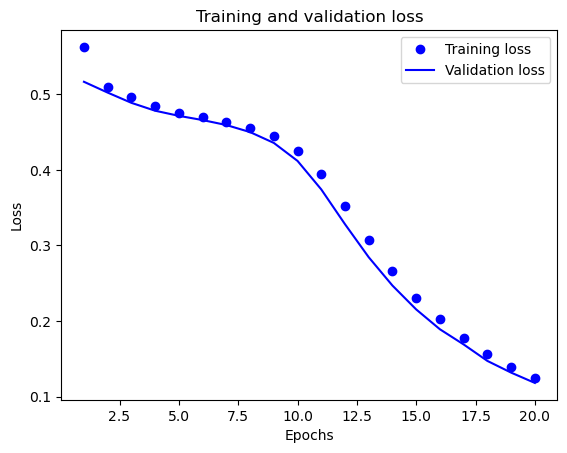

In [39]:
#Plotting validation scores
#graph between  Loss and validation loss
import matplotlib.pyplot as plt
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs= range(1,len(acc)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

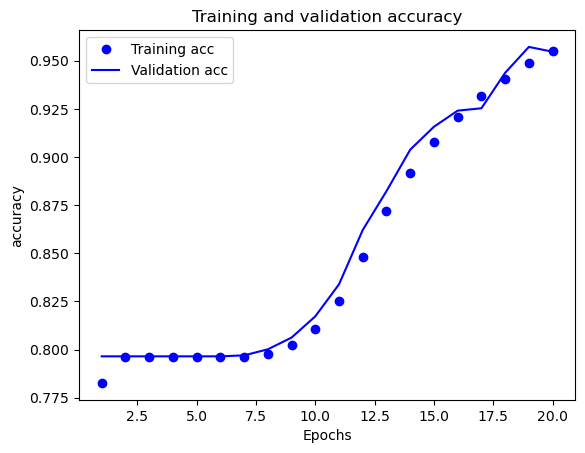

In [40]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [41]:
# final model

model=Sequential()
model.add(Dense(x.shape[1],activation='relu',input_dim=x.shape[1]))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=50000)


Epoch 1/20
57/57 [==============================] - 6s 83ms/step - loss: 0.5709 - accuracy: 0.7686
Epoch 2/20
57/57 [==============================] - 5s 82ms/step - loss: 0.5030 - accuracy: 0.7961
Epoch 3/20
57/57 [==============================] - 5s 83ms/step - loss: 0.4872 - accuracy: 0.7961
Epoch 4/20
57/57 [==============================] - 5s 85ms/step - loss: 0.4724 - accuracy: 0.7961
Epoch 5/20
57/57 [==============================] - 5s 83ms/step - loss: 0.4589 - accuracy: 0.7996
Epoch 6/20
57/57 [==============================] - 5s 84ms/step - loss: 0.4435 - accuracy: 0.8061
Epoch 7/20
57/57 [==============================] - 5s 85ms/step - loss: 0.4189 - accuracy: 0.8166
Epoch 8/20
57/57 [==============================] - 5s 79ms/step - loss: 0.3809 - accuracy: 0.8362
Epoch 9/20
57/57 [==============================] - 4s 78ms/step - loss: 0.3316 - accuracy: 0.8613
Epoch 10/20
57/57 [==============================] - 5s 79ms/step - loss: 0.2810 - accuracy: 0.8859
Epoch 11/

In [42]:
#evaluating model

test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

22014/22014 [==============================] - 71s 3ms/step - loss: 0.0699 - accuracy: 0.9778


In [43]:
test_mae_score

0.9778233170509338

In [44]:
test_mse_score

0.0698806568980217